In [14]:
import utils
import torch
import torchvision
import torchvision.datasets as dset
import numpy

import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

origin_set = dset.ImageFolder(root='~/data/GM10', transform=transform)
origin_loader =  torch.utils.data.DataLoader(set, batch_size=1, shuffle=False, num_workers=0)

step = 10
avg_distances = []; min_distances = []; max_distances = []; std_distances = []

for s in range(1, step + 1): # 1, ... 10
    # prepare the images
    if s != 1:
        set = dset.ImageFolder(root='~/data/GM10ipc_step%d/GM10ipc_step%d-valid'%(s, s), transform=transform)
        loader =  torch.utils.data.DataLoader(set, batch_size=1, shuffle=False, num_workers=0)
    else :
        set = dset.ImageFolder(root='~/data/GM10ipc/GM10ipc-valid', transform=transform)
        loader =  torch.utils.data.DataLoader(set, batch_size=1, shuffle=False, num_workers=0)

    # for each step...
    d = []
    for i, data in enumerate(loader, 0):
        unpack_image, unpack_label = data
        for j, ref_data in enumerate(origin_loader, 0):
            ref_image, ref_label = ref_data
            
            if ref_label != unpack_label:
                ValueError
            
            d.append(utils.lpips_loss(unpack_image, ref_image))
        
    avg_distances.append( sum(d)/len(d) )
    min_distances.append( min(d) )
    max_distances.append( max(d) )
    std_distances.append( numpy.std(d) )

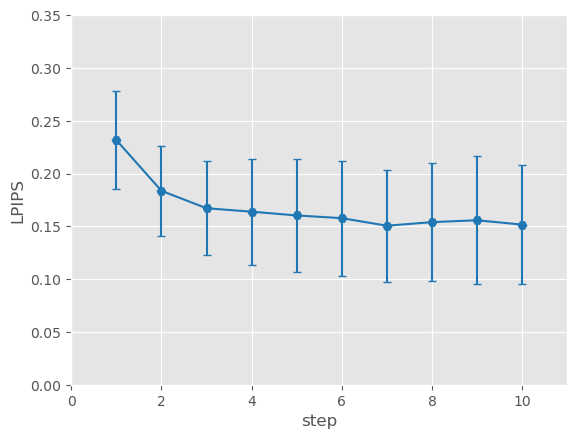

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

up_err = []
down_err = []

x = [int(i) for i in range(1, step+1)]
y = [i for i in avg_distances]
yerr = [tuple(std_distances)]

plt.style.use('ggplot')
plt.errorbar(x, y, yerr = yerr, marker='H', capsize=3, color='tab:blue')
plt.xlim(0, 11)
plt.ylim(0, 0.35)
plt.xlabel('step')
plt.ylabel('LPIPS')
plt.show()